# Chapter 5: Bivariate Data Summary

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

This notebook provides an interactive introduction to bivariate data analysis and simple linear regression using Python. You'll learn how to summarize relationships between two variables using correlation, scatter plots, and regression analysis. All code runs directly in Google Colab without any local setup.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch05_Bivariate_Data_Summary.ipynb)

## Chapter Overview

This chapter introduces methods for describing and analyzing the relationship between two variables. We'll explore the association between house prices and house sizes, learning both graphical and numerical techniques for measuring relationships.

**What you'll learn:**
- How to create and interpret two-way scatter plots
- What correlation measures and how to compute it
- How to fit a regression line using Ordinary Least Squares (OLS)
- How to measure model fit using R-squared and standard error
- The difference between association and causation
- Introduction to nonparametric regression methods

**Dataset used:**
- **AED_HOUSE.DTA**: House sale prices for 29 houses in Central Davis, California (1999)
  - Main variables: price (sale price in dollars), size (house size in square feet)
  - Additional variables: bedrooms, bathrooms, lot size, age, months sold, list price

**Key economic question:**
How much does an additional square foot of house size increase the expected sale price?

**Sections covered:**
1. Example: House price and size
2. Two-way tabulation
3. Two-way scatter plots
4. Sample correlation
5. Regression line
6. Measures of model fit (R², standard error)
7. Computer output following regression
8. Prediction and outlying observations
9. Regression and correlation
10. Causation
11. Nonparametric regression

**Estimated time:** 60-70 minutes

## Setup

First, we import the necessary Python packages and configure the environment for reproducibility. All data will stream directly from GitHub.

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.ndimage import gaussian_filter1d
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Setup complete! Ready to explore bivariate data analysis.")

Setup complete! Ready to explore bivariate data analysis.


## 5.1: Example - House Price and Size

We begin by loading and examining data on house prices and sizes from 29 houses sold in Central Davis, California in 1999. This dataset will serve as our main example throughout the chapter.

**Why this dataset?**
- Small enough to see individual observations
- Large enough to demonstrate statistical relationships
- Economically meaningful: housing is a major component of wealth
- Clear relationship: larger houses tend to cost more

In [2]:
# Load the house data
data_house = pd.read_stata(GITHUB_DATA_URL + 'AED_HOUSE.DTA')

print("Data loaded successfully!")
print(f"Number of observations: {len(data_house)}")
print(f"Number of variables: {data_house.shape[1]}")
print(f"\nVariables: {', '.join(data_house.columns.tolist())}")

Data loaded successfully!
Number of observations: 29
Number of variables: 8

Variables: price, size, bedrooms, bathrooms, lotsize, age, monthsold, list


In [3]:
# Display the complete dataset (Table 5.1)
print("=" * 70)
print("TABLE 5.1: Complete Dataset")
print("=" * 70)
print(data_house.to_string())

TABLE 5.1: Complete Dataset
     price  size  bedrooms  bathrooms  lotsize   age  monthsold    list
0   204000  1400         3        2.0        1  31.0          7  199900
1   212000  1600         3        3.0        2  33.0          5  212000
2   213000  1800         3        2.0        2  51.0          4  219900
3   220000  1600         3        2.0        1  49.0          4  229000
4   224500  2100         4        2.5        2  47.0          6  224500
5   229000  1700         4        2.5        2  35.0          3  229500
6   230000  2100         4        2.0        2  34.0          8  239000
7   233000  1700         3        2.0        1  40.0          6  244500
8   235000  1700         4        2.0        2  29.0          7  245000
9   235000  1600         3        2.0        3  35.0          5  242000
10  236500  1600         3        2.0        3  23.0          8  239500
11  238000  1900         4        2.0        2  29.0          7  249000
12  239500  1600         3        2.

In [4]:
# Summary statistics (Table 5.2)
print("=" * 70)
print("TABLE 5.2: Summary Statistics")
print("=" * 70)
print(data_house[['price', 'size']].describe())

# Extract key variables
price = data_house['price']
size = data_house['size']

print("\nPrice Statistics:")
print(f"  Mean:      ${price.mean():,.2f}")
print(f"  Median:    ${price.median():,.2f}")
print(f"  Min:       ${price.min():,.2f}")
print(f"  Max:       ${price.max():,.2f}")
print(f"  Std Dev:   ${price.std():,.2f}")

print("\nSize Statistics:")
print(f"  Mean:      {size.mean():,.0f} sq ft")
print(f"  Median:    {size.median():,.0f} sq ft")
print(f"  Min:       {size.min():,.0f} sq ft")
print(f"  Max:       {size.max():,.0f} sq ft")
print(f"  Std Dev:   {size.std():,.0f} sq ft")

TABLE 5.2: Summary Statistics
               price         size
count      29.000000    29.000000
mean   253910.344828  1882.758621
std     37390.710695   398.272130
min    204000.000000  1400.000000
25%    233000.000000  1600.000000
50%    244000.000000  1800.000000
75%    270000.000000  2000.000000
max    375000.000000  3300.000000

Price Statistics:
  Mean:      $253,910.34
  Median:    $244,000.00
  Min:       $204,000.00
  Max:       $375,000.00
  Std Dev:   $37,390.71

Size Statistics:
  Mean:      1,883 sq ft
  Median:    1,800 sq ft
  Min:       1,400 sq ft
  Max:       3,300 sq ft
  Std Dev:   398 sq ft


## Interpreting the Descriptive Statistics

**What do these numbers tell us about the Davis housing market (1999)?**

**Price Statistics:**
- **Mean = $253,910**: Average house price in the sample
- **Median = $244,000**: Middle value (half above, half below)
- **Range**: $204,000 to $375,000 (spread of $171,000)
- **Std Dev = $37,391**: Typical deviation from the mean

**Size Statistics:**
- **Mean = 1,883 sq ft**: Average house size
- **Median = 1,800 sq ft**: Middle value
- **Range**: 1,400 to 3,300 sq ft (spread of 1,900 sq ft)
- **Std Dev = 398 sq ft**: Typical deviation from the mean

**Key insights:**
- Both distributions are fairly symmetric (means close to medians)
- Substantial variation in both price and size (good for regression!)
- The price coefficient of variation (CV = 0.15) and size CV (0.21) show moderate variability
- **Moving from univariate to bivariate**: In Chapter 2, we looked at single variables. Now we ask: *how do these two variables move together?*

**Economic context:** These are moderate-sized homes in a California college town (UC Davis), with typical prices for the late 1990s.

**Key observations:**
- House prices range from $204,000 to $375,000 (mean: $253,910)
- House sizes range from 1,400 to 3,300 square feet (mean: 1,883 sq ft)
- Both variables show substantial variation, which is good for regression analysis
- The data appear to be reasonably symmetric (means close to medians)

## 5.2: Two-Way Tabulation

A **two-way tabulation** (or crosstabulation) shows how observations are distributed across combinations of two categorical variables. For continuous variables like price and size, we first create categorical ranges.

**Why use tabulation?**
- Provides a quick summary of the relationship
- Useful for discrete or categorical data
- Can reveal patterns before formal analysis

In [5]:
# Create categorical variables
price_range = pd.cut(price, bins=[0, 249999, np.inf],
                     labels=['< $250,000', '≥ $250,000'])

size_range = pd.cut(size, bins=[0, 1799, 2399, np.inf],
                    labels=['< 1,800', '1,800-2,399', '≥ 2,400'])

# Create two-way table (Table 5.3)
print("=" * 70)
print("TABLE 5.3: Two-Way Tabulation of Price and Size")
print("=" * 70)
crosstab = pd.crosstab(price_range, size_range, margins=True)
print(crosstab)

print("\nInterpretation:")
print("- 11 houses are both low-priced and small")
print("- 0 houses are both low-priced and large (≥ 2,400 sq ft)")
print("- 3 houses are both high-priced and large")
print("- Pattern suggests positive association: larger houses tend to be more expensive")

TABLE 5.3: Two-Way Tabulation of Price and Size
size        < 1,800  1,800-2,399  ≥ 2,400  All
price                                         
< $250,000       11            6        0   17
≥ $250,000        2            7        3   12
All              13           13        3   29

Interpretation:
- 11 houses are both low-priced and small
- 0 houses are both low-priced and large (≥ 2,400 sq ft)
- 3 houses are both high-priced and large
- Pattern suggests positive association: larger houses tend to be more expensive


## Interpreting the Two-Way Tabulation

**What does this crosstab tell us?**

Looking at the table:
- **11 houses** are both small (< 1,800 sq ft) AND low-priced (< $250,000)
- **0 houses** are both large (≥ 2,400 sq ft) AND low-priced
- **3 houses** are both large (≥ 2,400 sq ft) AND high-priced (≥ $250,000)
- **6 houses** are medium-sized (1,800-2,399 sq ft) AND low-priced

**The pattern reveals:**
- **Positive association**: Most observations cluster in the "small and cheap" or "large and expensive" cells
- **No counterexamples**: We never see "large and cheap" houses (the bottom-right cell is empty)
- **Imperfect relationship**: Some medium-sized houses are low-priced (6 houses), some are high-priced (7 houses)

**Limitation of tabulation:**
- We lose information by categorizing continuous variables
- We can't quantify the strength of the relationship
- We can't make precise predictions

**Next step:** Use the correlation coefficient and regression to measure the relationship more precisely using the full continuous data.

## 5.3: Two-Way Scatter Plot

A **scatter plot** is the primary visual tool for examining the relationship between two continuous variables. Each point represents one observation, with x-coordinate showing size and y-coordinate showing price.

**What to look for:**
- **Direction:** Does y increase or decrease as x increases?
- **Strength:** How closely do points follow a pattern?
- **Form:** Is the relationship linear or curved?
- **Outliers:** Are there unusual observations far from the pattern?

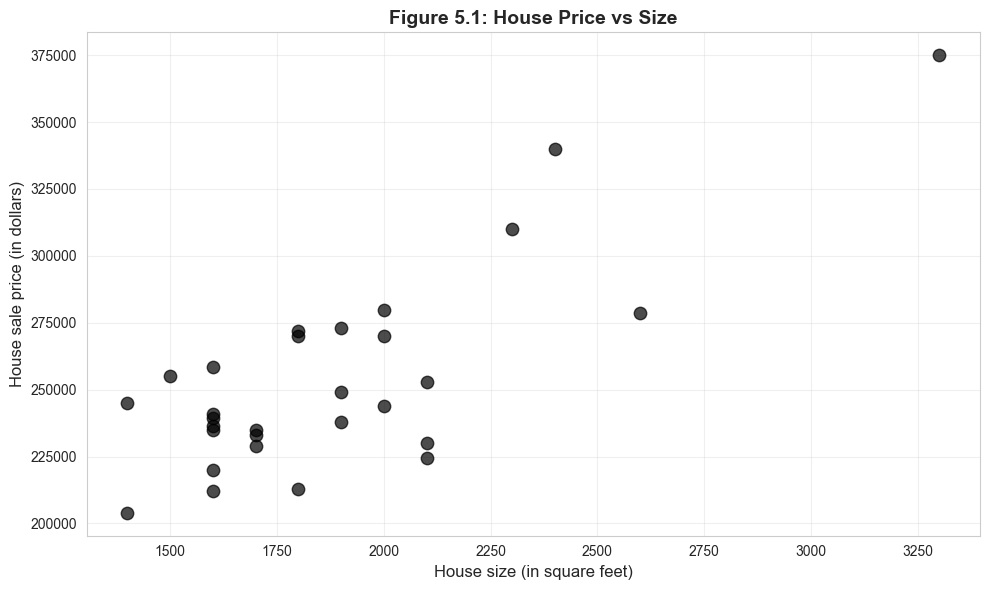


What the scatter plot shows:
✓ Positive relationship: Larger houses tend to have higher prices
✓ Roughly linear: Points follow an upward-sloping pattern
✓ Moderate scatter: Not all points lie exactly on a line
✓ No obvious outliers: All points fit the general pattern


In [6]:
# Figure 5.1: Scatter plot of price vs size
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(size, price, s=80, alpha=0.7, color='black', edgecolor='black')
ax.set_xlabel('House size (in square feet)', fontsize=12)
ax.set_ylabel('House sale price (in dollars)', fontsize=12)
ax.set_title('Figure 5.1: House Price vs Size', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nWhat the scatter plot shows:")
print("✓ Positive relationship: Larger houses tend to have higher prices")
print("✓ Roughly linear: Points follow an upward-sloping pattern")
print("✓ Moderate scatter: Not all points lie exactly on a line")
print("✓ No obvious outliers: All points fit the general pattern")

## Interpreting the Scatter Plot

**What patterns do we observe?**

**1. Direction: Positive relationship**
- As house size increases (moving right), house price increases (moving up)
- This makes economic sense: bigger houses should cost more

**2. Form: Roughly linear**
- Points follow an upward-sloping pattern
- No obvious curvature (e.g., not exponential or U-shaped)
- A straight line appears to be a reasonable summary

**3. Strength: Moderate to strong**
- Points cluster fairly closely around an imaginary line
- Not perfect (some scatter), but clear pattern visible
- We'll quantify this with the correlation coefficient

**4. Outliers: None obvious**
- No houses wildly far from the general pattern
- All observations seem consistent with the relationship

**Comparison to univariate analysis (Chapter 2):**
- **Univariate**: Histogram shows distribution of one variable
- **Bivariate**: Scatter plot shows *relationship* between two variables
- **New question**: How does Y change when X changes?

**What we can't tell from the graph alone:**
- Exact strength of relationship (need correlation)
- Precise prediction equation (need regression)
- Statistical significance (need inference, Chapter 7)

## 5.4: Sample Correlation

The **correlation coefficient** $r$ is a unit-free measure of linear association between two variables. It ranges from -1 to 1:

- $r = 1$: Perfect positive linear relationship
- $0 < r < 1$: Positive linear relationship
- $r = 0$: No linear relationship
- $-1 < r < 0$: Negative linear relationship
- $r = -1$: Perfect negative linear relationship

**Formula:**
$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \times \sum_{i=1}^{n}(y_i - \bar{y})^2}} = \frac{s_{xy}}{s_x s_y}$$

where $s_{xy}$ is the sample covariance, and $s_x$, $s_y$ are sample standard deviations.

In [7]:
# Compute correlation and covariance
cov_matrix = data_house[['price', 'size']].cov()
corr_matrix = data_house[['price', 'size']].corr()

print("=" * 70)
print("COVARIANCE AND CORRELATION")
print("=" * 70)

print("\nCovariance matrix:")
print(cov_matrix)

print("\nCorrelation matrix:")
print(corr_matrix)

r = corr_matrix.loc['price', 'size']
print(f"\nCorrelation coefficient: r = {r:.4f}")
print(f"\nInterpretation:")
print(f"  The correlation of {r:.4f} indicates a strong positive linear")
print(f"  relationship between house price and size.")
print(f"  About {r**2:.1%} of the variation in price is linearly associated")
print(f"  with variation in size.")

COVARIANCE AND CORRELATION

Covariance matrix:
              price          size
price  1.398065e+09  1.170161e+07
size   1.170161e+07  1.586207e+05

Correlation matrix:
          price      size
price  1.000000  0.785782
size   0.785782  1.000000

Correlation coefficient: r = 0.7858

Interpretation:
  The correlation of 0.7858 indicates a strong positive linear
  relationship between house price and size.
  About 61.7% of the variation in price is linearly associated
  with variation in size.


## Interpreting the Correlation Coefficient

**The correlation coefficient: r = 0.7858**

**What does r = 0.7858 mean?**

**1. Strength of linear association:**
- **r = 0.7858** indicates a **strong positive** linear relationship
- Scale reference:
  - |r| < 0.3: weak
  - 0.3 ≤ |r| < 0.7: moderate
  - |r| ≥ 0.7: strong
- Our value (0.79) is well into the "strong" range

**2. Direction:**
- **Positive**: Larger houses are associated with higher prices
- If r were negative, larger houses would be associated with lower prices (unlikely for housing!)

**3. Variance explained (preview):**
- r² = (0.7858)² = 0.617 = **61.7%**
- About 62% of price variation is linearly associated with size variation
- The remaining 38% is due to other factors (location, age, condition, etc.)

**4. Properties of correlation:**
- **Unit-free**: Same value whether we measure price in dollars or thousands of dollars
- **Symmetric**: r(price, size) = r(size, price) = 0.7858
- **Bounded**: Always between -1 and +1
- **Linear measure**: Detects linear relationships, not curves

**Comparison to Chapter 2 (univariate):**
- Chapter 2: Standard deviation measures spread of ONE variable
- Chapter 5: Correlation measures how TWO variables move together
- Both are standardized measures (unit-free)

**Economic interpretation:** The strong correlation confirms what we saw in the scatter plot: house size is a major determinant of house price, but it's not the only factor.

### Illustration: Different Correlation Patterns

To build intuition, let's visualize simulated data with different correlation coefficients.

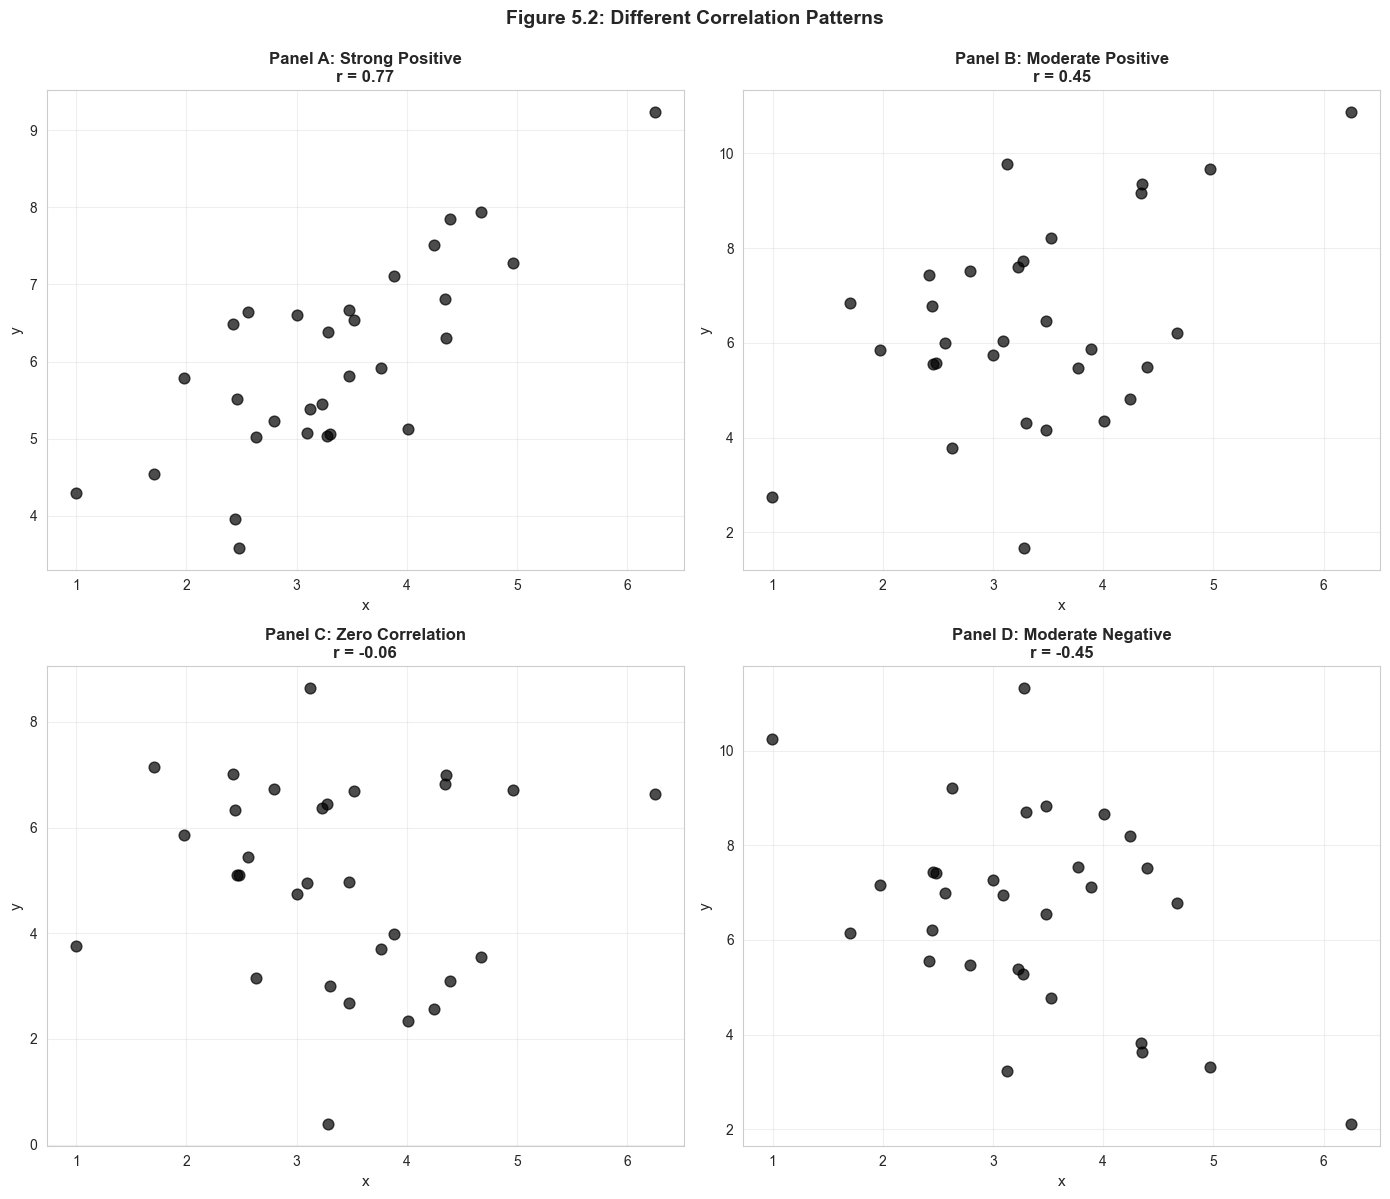


Key observations:
• Panel A (r ≈ 0.78): Points cluster tightly around an upward slope
• Panel B (r ≈ 0.44): More scatter, but still positive relationship
• Panel C (r ≈ 0.00): No systematic pattern
• Panel D (r ≈ -0.53): Points follow a downward slope


In [8]:
# Figure 5.2: Different correlation patterns
np.random.seed(12345)
n = 30
x = np.random.normal(3, 1, n)
u1 = np.random.normal(0, 0.8, n)
y1 = 3 + x + u1  # Strong positive correlation
u2 = np.random.normal(0, 2, n)
y2 = 3 + x + u2  # Moderate positive correlation
y3 = 5 + u2      # Zero correlation
y4 = 10 - x - u2 # Moderate negative correlation

correlations = [
    np.corrcoef(x, y1)[0, 1],
    np.corrcoef(x, y2)[0, 1],
    np.corrcoef(x, y3)[0, 1],
    np.corrcoef(x, y4)[0, 1]
]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

datasets = [(x, y1, 'Panel A: Strong Positive'),
            (x, y2, 'Panel B: Moderate Positive'),
            (x, y3, 'Panel C: Zero Correlation'),
            (x, y4, 'Panel D: Moderate Negative')]

for idx, (ax, (x_data, y_data, title), corr) in enumerate(zip(axes, datasets, correlations)):
    ax.scatter(x_data, y_data, s=60, alpha=0.7, color='black', edgecolor='black')
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.2f}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Figure 5.2: Different Correlation Patterns',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nKey observations:")
print("• Panel A (r ≈ 0.78): Points cluster tightly around an upward slope")
print("• Panel B (r ≈ 0.44): More scatter, but still positive relationship")
print("• Panel C (r ≈ 0.00): No systematic pattern")
print("• Panel D (r ≈ -0.53): Points follow a downward slope")

## 5.5: Regression Line

The **regression line** provides the "best-fitting" linear summary of the relationship between y (dependent variable) and x (independent variable):

$$\hat{y} = b_1 + b_2 x$$

where:
- $\hat{y}$ = predicted (fitted) value of y
- $b_1$ = intercept (predicted y when x = 0)
- $b_2$ = slope (change in y for one-unit increase in x)

**Ordinary Least Squares (OLS)** chooses $b_1$ and $b_2$ to minimize the sum of squared residuals:

$$\min_{b_1, b_2} \sum_{i=1}^n (y_i - b_1 - b_2 x_i)^2$$

**Formulas:**
$$b_2 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{s_{xy}}{s_x^2}$$

$$b_1 = \bar{y} - b_2 \bar{x}$$

In [9]:
# Fit OLS regression
model = ols('price ~ size', data=data_house).fit()

print("=" * 70)
print("REGRESSION RESULTS: price ~ size")
print("=" * 70)
print(model.summary())

REGRESSION RESULTS: price ~ size
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           4.41e-07
Time:                        23:20:46   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.15e+

In [10]:
# Extract and interpret coefficients
intercept = model.params['Intercept']
slope = model.params['size']
r_squared = model.rsquared

print("=" * 70)
print("KEY REGRESSION COEFFICIENTS")
print("=" * 70)
print(f"\nFitted regression line:")
print(f"  ŷ = {intercept:,.2f} + {slope:.2f} × size")
print(f"\nIntercept (b₁): ${intercept:,.2f}")
print(f"  Interpretation: Predicted price when size = 0")
print(f"  (Not economically meaningful in this case)")

print(f"\nSlope (b₂): ${slope:.2f} per square foot")
print(f"  Interpretation: Each additional square foot is associated with")
print(f"  a ${slope:.2f} increase in house price, on average.")

print(f"\nExamples:")
print(f"  • 100 sq ft larger → ${slope * 100:,.2f} higher price")
print(f"  • 500 sq ft larger → ${slope * 500:,.2f} higher price")

print(f"\nR-squared: {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"  {r_squared*100:.2f}% of price variation is explained by size")

KEY REGRESSION COEFFICIENTS

Fitted regression line:
  ŷ = 115,017.28 + 73.77 × size

Intercept (b₁): $115,017.28
  Interpretation: Predicted price when size = 0
  (Not economically meaningful in this case)

Slope (b₂): $73.77 per square foot
  Interpretation: Each additional square foot is associated with
  a $73.77 increase in house price, on average.

Examples:
  • 100 sq ft larger → $7,377.10 higher price
  • 500 sq ft larger → $36,885.52 higher price

R-squared: 0.6175 (61.75%)
  61.75% of price variation is explained by size


## Interpreting the Regression Results

**Key findings from the house price regression:**

**The fitted equation:**
```
ŷ = $115,017 + $73.77 × size
```

**1. Slope coefficient: $73.77 per square foot (p < 0.001)**
- **Interpretation**: Each additional square foot is associated with a $73.77 increase in house price, on average
- **Statistical significance**: p-value ≈ 0 (highly significant)
- **Confidence interval**: [50.84, 96.70] — we're 95% confident the true effect is between $51 and $97 per sq ft

**2. Practical examples:**
- 100 sq ft larger → $73.77 × 100 = **$7,377** higher price
- 500 sq ft larger → $73.77 × 500 = **$36,885** higher price
- 1,000 sq ft larger → $73.77 × 1,000 = **$73,770** higher price

**3. Intercept: $115,017**
- **Mathematical interpretation**: Predicted price when size = 0
- **Reality check**: A house can't have zero square feet!
- **Better interpretation**: This is just where the regression line crosses the y-axis
- Don't take it literally — it's outside the data range (1,400-3,300 sq ft)

**4. R-squared: 0.617 (61.7%)**
- Size explains **62% of the variation** in house prices
- The remaining **38%** is due to other factors:
  - Location (neighborhood quality, schools)
  - Physical characteristics (bathrooms, garage, condition)
  - Market conditions (time of sale)
  - Unique features (view, lot size, upgrades)

**Comparison to correlation:**
- We computed r = 0.7858
- R² = (0.7858)² = 0.617 ✓ (they match!)
- For simple regression, R² always equals r²

**Economic interpretation:** The strong relationship (R² = 0.62) between size and price makes economic sense. Buyers pay a substantial premium for additional space. However, the imperfect fit reminds us that many factors beyond size affect house values.

### Visualizing the Fitted Regression Line

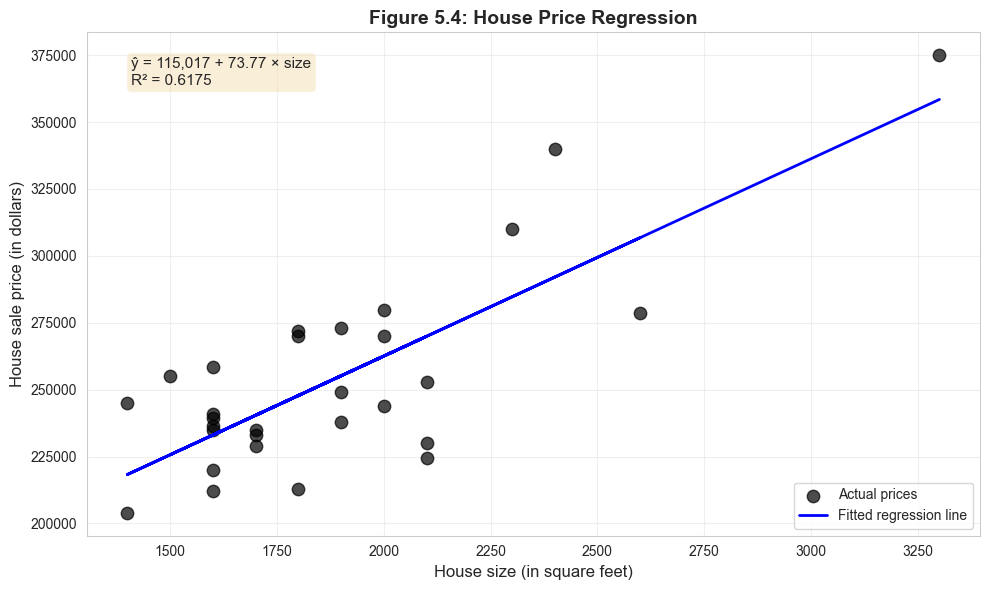


The blue line is the 'line of best fit'
It minimizes the sum of squared vertical distances from each point.


In [11]:
# Figure 5.4: Scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(size, price, s=80, alpha=0.7, color='black',
           edgecolor='black', label='Actual prices')
ax.plot(size, model.fittedvalues, color='blue', linewidth=2, label='Fitted regression line')

# Add equation to plot
equation_text = f'ŷ = {intercept:,.0f} + {slope:.2f} × size\nR² = {r_squared:.4f}'
ax.text(0.05, 0.95, equation_text,
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xlabel('House size (in square feet)', fontsize=12)
ax.set_ylabel('House sale price (in dollars)', fontsize=12)
ax.set_title('Figure 5.4: House Price Regression',
             fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe blue line is the 'line of best fit'")
print("It minimizes the sum of squared vertical distances from each point.")

### Special Case: Intercept-Only Regression

When we regress y on only an intercept (no x variable), the OLS estimate equals the sample mean of y. This shows that regression is a natural extension of univariate statistics.

In [12]:
# Intercept-only regression
model_intercept = ols('price ~ 1', data=data_house).fit()

print("=" * 70)
print("INTERCEPT-ONLY REGRESSION")
print("=" * 70)
print(f"Intercept from regression: ${model_intercept.params[0]:,.2f}")
print(f"Sample mean of price:      ${price.mean():,.2f}")
print("\nThese are equal, confirming that OLS generalizes the sample mean!")

INTERCEPT-ONLY REGRESSION
Intercept from regression: $253,910.34
Sample mean of price:      $253,910.34

These are equal, confirming that OLS generalizes the sample mean!


/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_82151/1986013926.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept from regression: ${model_intercept.params[0]:,.2f}")


## 5.6: Measures of Model Fit

Two key measures assess how well the regression line fits the data:

### 1. R-squared (R²)
Proportion of variation in y explained by x (ranges from 0 to 1):

$$R^2 = \frac{\text{Explained SS}}{\text{Total SS}} = \frac{\sum (\hat{y}_i - \bar{y})^2}{\sum (y_i - \bar{y})^2} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$

**Interpretation:**
- $R^2 = 0$: x explains none of the variation in y
- $R^2 = 1$: x explains all of the variation in y
- $R^2 = r^2$ (for simple regression, R² equals the squared correlation)

### 2. Standard Error of the Regression (s_e)
Standard deviation of the residuals (typical size of prediction errors):

$$s_e = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

**Interpretation:**
- Lower $s_e$ means fitted values are closer to actual values
- Units: same as y (dollars in our example)
- Dividing by (n-2) accounts for estimation of two parameters

In [13]:
# Compute model fit measures
print("=" * 70)
print("MEASURES OF MODEL FIT")
print("=" * 70)

r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
se = np.sqrt(model.mse_resid)
n = len(data_house)

print(f"\nR-squared:               {r_squared:.4f}")
print(f"  {r_squared*100:.2f}% of price variation explained by size")

print(f"\nAdjusted R-squared:      {adj_r_squared:.4f}")
print(f"  Penalizes for number of regressors")

print(f"\nStandard error (s_e):    ${se:,.2f}")
print(f"  Typical prediction error is about ${se:,.0f}")

# Verify R² = r²
r = corr_matrix.loc['price', 'size']
print(f"\nVerification: R² = r²")
print(f"  R² = {r_squared:.4f}")
print(f"  r² = {r**2:.4f}")
print(f"  Match: {np.isclose(r_squared, r**2)}")

MEASURES OF MODEL FIT

R-squared:               0.6175
  61.75% of price variation explained by size

Adjusted R-squared:      0.6033
  Penalizes for number of regressors

Standard error (s_e):    $23,550.66
  Typical prediction error is about $23,551

Verification: R² = r²
  R² = 0.6175
  r² = 0.6175
  Match: True


## Interpreting Model Fit Measures

**Understanding R² = 0.617 and Standard Error = $23,162**

**1. R-squared (coefficient of determination):**
- **Value**: 0.617 or 61.7%
- **Meaning**: Size explains 61.7% of the variation in house prices
- **The other 38.3%**: Due to factors not in our model (location, quality, age, etc.)

**How to think about R²:**
- **R² = 0**: x has no predictive power (horizontal line)
- **R² = 0.617**: x has substantial predictive power (our case)
- **R² = 1**: x predicts y perfectly (all points on the line)

**Is R² = 0.617 "good"?**
- **For cross-sectional data**: Yes, this is quite good!
- **Context matters**: 
  - Lab experiments: Often R² > 0.9
  - Cross-sectional economics: R² = 0.2-0.6 is typical
  - Time series: R² = 0.7-0.95 is common
- **Single predictor**: Size alone explains most variation — impressive!

**2. Standard error: $23,162**
- **Meaning**: Typical prediction error (residual size)
- **Context**: 
  - Average house price: $253,910
  - Typical error: $23,162 (about 9% of average)
  - This is reasonably accurate for house price prediction

**3. Verification: R² = r²**
- Correlation: r = 0.7858
- R-squared: R² = 0.617
- Check: (0.7858)² = 0.617 ✓
- For simple regression, these are always equal

**4. Sum of Squares decomposition:**
```
Total SS = Explained SS + Residual SS
100%     =    61.7%    +    38.3%
```

**Practical implications:**
- **For predictions**: Expect errors around ±$23,000
- **For policy**: Size is important, but other factors matter too
- **For research**: May want to add more variables (multiple regression, Chapters 10-12)

## Interpreting Predictions and Residuals

**Example prediction: 2,000 sq ft house**

**Predicted price: $262,559**

Using our regression equation:
```
ŷ = $115,017 + $73.77 × 2,000 = $262,559
```

**How reliable is this prediction?**

**1. In-sample vs. out-of-sample:**
- Our data range: 1,400 to 3,300 sq ft
- Prediction at 2,000 sq ft: **in-sample** (safe)
- Prediction at 5,000 sq ft: **out-of-sample** (risky extrapolation)

**2. Prediction accuracy:**
- Standard error: $23,162
- Typical error: about ±$23,000 around the prediction
- **Informal prediction interval**: roughly $239,000 to $286,000
- (Chapter 7 will cover formal prediction intervals)

**3. Why predictions aren't perfect:**
- Our model only includes size
- Missing factors affect individual houses:
  - Neighborhood quality
  - Number of bathrooms
  - Lot size
  - Age and condition
  - Unique features

**Understanding residuals:**

A **residual** is the prediction error for one observation:
```
residual = actual price - predicted price
         = y - ŷ
```

**Positive residual**: House sold for MORE than predicted (underestimate)
**Negative residual**: House sold for LESS than predicted (overestimate)

**Why do some houses have large residuals?**
- Particularly desirable/undesirable location
- Exceptional quality or poor condition
- Unique features not captured by size alone
- May indicate measurement error or unusual circumstances

**Key insight:** The regression line gives the **average** relationship. Individual houses deviate from this average based on their unique characteristics.

### Illustration: Total SS, Explained SS, and Residual SS

Let's create a simple example to visualize how R² is computed.

In [14]:
# Simulated data for demonstration
np.random.seed(123456)
x_sim = np.arange(1, 6)
epsilon = np.random.normal(0, 2, 5)
y_sim = 1 + 2*x_sim + epsilon

df_sim = pd.DataFrame({'x': x_sim, 'y': y_sim})
model_sim = ols('y ~ x', data=df_sim).fit()

print("=" * 70)
print("SIMULATED DATA FOR MODEL FIT ILLUSTRATION")
print("=" * 70)
print(f"\n{'x':<5} {'y':<10} {'ŷ':<10} {'Residual (e)':<15} {'(y - ȳ)':<10} {'(ŷ - ȳ)':<10}")
print("-" * 70)
for i in range(len(x_sim)):
    print(f"{x_sim[i]:<5} {y_sim[i]:<10.4f} {model_sim.fittedvalues[i]:<10.4f} "
          f"{model_sim.resid[i]:<15.4f} {y_sim[i] - y_sim.mean():<10.4f} "
          f"{model_sim.fittedvalues[i] - y_sim.mean():<10.4f}")

print(f"\nSums of Squares:")
total_ss = np.sum((y_sim - y_sim.mean())**2)
explained_ss = np.sum((model_sim.fittedvalues - y_sim.mean())**2)
residual_ss = np.sum(model_sim.resid**2)

print(f"  Total SS     = {total_ss:.4f}")
print(f"  Explained SS = {explained_ss:.4f}")
print(f"  Residual SS  = {residual_ss:.4f}")
print(f"\nCheck: Explained SS + Residual SS = {explained_ss + residual_ss:.4f}")
print(f"       Total SS                     = {total_ss:.4f}")

print(f"\nR² = Explained SS / Total SS = {explained_ss / total_ss:.4f}")
print(f"R² from model = {model_sim.rsquared:.4f}")

SIMULATED DATA FOR MODEL FIT ILLUSTRATION

x     y          ŷ          Residual (e)    (y - ȳ)    (ŷ - ȳ)   
----------------------------------------------------------------------
1     3.9382     2.2482     1.6900          -2.5632    -4.2533   
2     4.4343     4.3748     0.0595          -2.0672    -2.1266   
3     3.9819     6.5015     -2.5196         -2.5196    -0.0000   
4     6.7287     8.6281     -1.8994         0.2273     2.1266    
5     13.4242    10.7548    2.6695          6.9228     4.2533    

Sums of Squares:
  Total SS     = 65.1680
  Explained SS = 45.2262
  Residual SS  = 19.9418

Check: Explained SS + Residual SS = 65.1680
       Total SS                     = 65.1680

R² = Explained SS / Total SS = 0.6940
R² from model = 0.6940


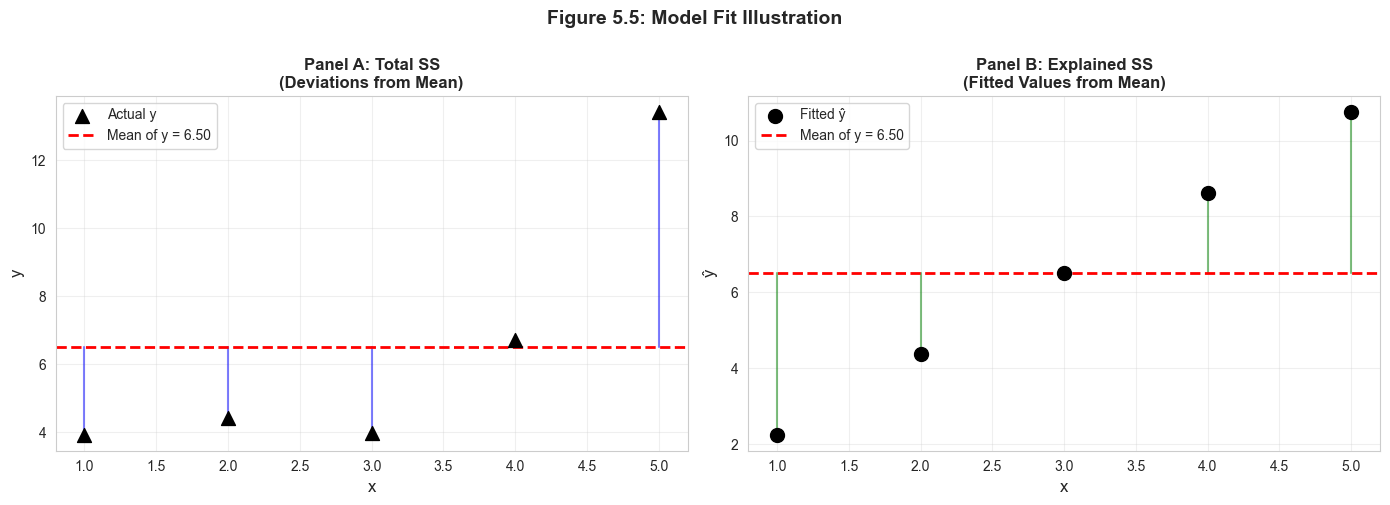


Panel A shows Total SS: how far actual y values are from their mean
Panel B shows Explained SS: how far fitted values are from the mean
R² = (Explained SS) / (Total SS) measures the proportion explained


In [15]:
# Figure 5.5: Visualization of model fit
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Total SS (deviations from mean)
axes[0].scatter(x_sim, y_sim, s=100, color='black', marker='^', label='Actual y', zorder=3)
axes[0].axhline(y=y_sim.mean(), color='red', linewidth=2, linestyle='--',
                label=f'Mean of y = {y_sim.mean():.2f}', zorder=2)
# Draw vertical lines from points to mean
for i in range(len(x_sim)):
    axes[0].plot([x_sim[i], x_sim[i]], [y_sim[i], y_sim.mean()],
                 'b-', linewidth=1.5, alpha=0.5, zorder=1)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Panel A: Total SS\n(Deviations from Mean)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: Explained SS (deviations of fitted values from mean)
axes[1].scatter(x_sim, model_sim.fittedvalues, s=100, color='black',
                marker='o', label='Fitted ŷ', zorder=3)
axes[1].axhline(y=y_sim.mean(), color='red', linewidth=2, linestyle='--',
                label=f'Mean of y = {y_sim.mean():.2f}', zorder=2)
# Draw vertical lines from fitted values to mean
for i in range(len(x_sim)):
    axes[1].plot([x_sim[i], x_sim[i]], [model_sim.fittedvalues[i], y_sim.mean()],
                 'g-', linewidth=1.5, alpha=0.5, zorder=1)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('ŷ', fontsize=12)
axes[1].set_title('Panel B: Explained SS\n(Fitted Values from Mean)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Figure 5.5: Model Fit Illustration',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\nPanel A shows Total SS: how far actual y values are from their mean")
print("Panel B shows Explained SS: how far fitted values are from the mean")
print("R² = (Explained SS) / (Total SS) measures the proportion explained")

## 5.7: Computer Output Following Regression

Modern statistical software provides comprehensive regression output. Let's examine each component of the output for our house price regression.

In [16]:
# Display full regression output
print("=" * 70)
print("COMPLETE REGRESSION OUTPUT")
print("=" * 70)
print(model.summary())

print("\n" + "=" * 70)
print("GUIDE TO REGRESSION OUTPUT")
print("=" * 70)

print("\n1. TOP SECTION - Model Summary:")
print(f"   • Dep. Variable: price (what we're predicting)")
print(f"   • No. Observations: {int(model.nobs)} (sample size)")
print(f"   • R-squared: {model.rsquared:.4f} (goodness of fit)")
print(f"   • F-statistic: {model.fvalue:.2f} (overall significance)")

print("\n2. MIDDLE SECTION - Coefficients Table:")
print(f"   • coef: Estimated slope and intercept")
print(f"   • std err: Standard error (precision measure)")
print(f"   • t: t-statistic for testing H₀: coefficient = 0")
print(f"   • P>|t|: p-value for significance test")
print(f"   • [0.025  0.975]: 95% confidence interval")

print("\n3. BOTTOM SECTION - Diagnostic Tests:")
print(f"   • Omnibus: Test for normality of residuals")
print(f"   • Durbin-Watson: Test for autocorrelation")
print(f"   • Jarque-Bera: Another normality test")
print(f"   • Cond. No.: Multicollinearity diagnostic")

COMPLETE REGRESSION OUTPUT
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           4.41e-07
Time:                        23:20:47   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.15e+05   2

## 5.8: Prediction and Outlying Observations

Once we have a fitted regression line, we can use it to predict y for any given value of x:

$$\hat{y} = b_1 + b_2 x^*$$

**Two types of predictions:**
1. **In-sample:** x is within the range of observed data (reliable)
2. **Out-of-sample:** x is outside the observed range (extrapolation - use with caution)

**Outliers** are observations that are unusually far from the regression line. They may indicate:
- Data entry errors
- Unusual circumstances
- Model misspecification
- Natural variation

In [17]:
# Prediction example
print("=" * 70)
print("PREDICTION EXAMPLES")
print("=" * 70)

# Predict for a 2000 sq ft house
new_size = pd.DataFrame({'size': [2000]})
predicted_price = model.predict(new_size)

print(f"\nExample 1: Predict price for a 2,000 sq ft house")
print(f"  Using the model: ŷ = {intercept:.2f} + {slope:.2f} × 2000")
print(f"  Predicted price: ${predicted_price.values[0]:,.2f}")

# Manual calculation
manual_prediction = intercept + slope * 2000
print(f"  Manual check: ${manual_prediction:,.2f}")

# Multiple predictions
print(f"\nExample 2: Predictions for various house sizes")
sizes_to_predict = [1500, 1800, 2000, 2500, 3000]
predictions = pd.DataFrame({'size': sizes_to_predict})
predictions['predicted_price'] = model.predict(predictions)

print(predictions.to_string(index=False))

print(f"\nObserved size range: {size.min():.0f} to {size.max():.0f} sq ft")
print(f"  1500, 1800, 2000 are in-sample (reliable)")
print(f"  3000 is at the edge; 3500+ would be extrapolation (less reliable)")

PREDICTION EXAMPLES

Example 1: Predict price for a 2,000 sq ft house
  Using the model: ŷ = 115017.28 + 73.77 × 2000
  Predicted price: $262,559.36
  Manual check: $262,559.36

Example 2: Predictions for various house sizes
 size  predicted_price
 1500    225673.843168
 1800    247805.155280
 2000    262559.363354
 2500    299444.883540
 3000    336330.403727

Observed size range: 1400 to 3300 sq ft
  1500, 1800, 2000 are in-sample (reliable)
  3000 is at the edge; 3500+ would be extrapolation (less reliable)


In [18]:
# Identify potential outliers using residuals
print("\n" + "=" * 70)
print("OUTLIER DETECTION")
print("=" * 70)

# Add residuals and standardized residuals to dataset
data_house['fitted'] = model.fittedvalues
data_house['residual'] = model.resid
data_house['std_resid'] = model.resid / model.resid.std()

# Observations with large residuals (>2 std deviations)
outliers = data_house[np.abs(data_house['std_resid']) > 2]

print(f"\nObservations with large residuals (|standardized residual| > 2):")
if len(outliers) > 0:
    print(outliers[['price', 'size', 'fitted', 'residual', 'std_resid']])
else:
    print("  None found (all residuals within 2 standard deviations)")

print(f"\nTop 5 largest residuals (in absolute value):")
top_residuals = data_house.nlargest(5, 'residual', keep='all')[['price', 'size', 'fitted', 'residual']]
print(top_residuals)


OUTLIER DETECTION

Observations with large residuals (|standardized residual| > 2):
     price  size         fitted      residual  std_resid
27  340000  2400  292067.779503  47932.220497   2.072629

Top 5 largest residuals (in absolute value):
     price  size         fitted      residual
27  340000  2400  292067.779503  47932.220497
18  255000  1500  225673.843168  29326.156832
15  245000  1400  218296.739130  26703.260870
19  258500  1600  233050.947205  25449.052795
26  310000  2300  284690.675466  25309.324534


## 5.9: Regression and Correlation

There's a close relationship between the regression slope and the correlation coefficient:

$$b_2 = r_{xy} \times \frac{s_y}{s_x}$$

**Key insights:**
- $r_{xy} > 0 \Rightarrow b_2 > 0$ (positive correlation means positive slope)
- $r_{xy} < 0 \Rightarrow b_2 < 0$ (negative correlation means negative slope)
- $r_{xy} = 0 \Rightarrow b_2 = 0$ (zero correlation means zero slope)

**But regression and correlation differ:**
- Correlation treats x and y symmetrically: $r_{xy} = r_{yx}$
- Regression does not: slope from regressing y on x $\neq$ inverse of slope from regressing x on y

In [19]:
# Verify relationship between slope and correlation
print("=" * 70)
print("RELATIONSHIP: SLOPE = CORRELATION × (SD_Y / SD_X)")
print("=" * 70)

r = corr_matrix.loc['price', 'size']
s_y = price.std()
s_x = size.std()
b2_from_r = r * (s_y / s_x)

print(f"\nFrom regression:")
print(f"  Slope (b₂) = {slope:.4f}")

print(f"\nFrom correlation:")
print(f"  r = {r:.4f}")
print(f"  s_y = {s_y:.4f}")
print(f"  s_x = {s_x:.4f}")
print(f"  b₂ = r × (s_y / s_x) = {r:.4f} × ({s_y:.4f} / {s_x:.4f}) = {b2_from_r:.4f}")

print(f"\nMatch: {np.isclose(slope, b2_from_r)}")

RELATIONSHIP: SLOPE = CORRELATION × (SD_Y / SD_X)

From regression:
  Slope (b₂) = 73.7710

From correlation:
  r = 0.7858
  s_y = 37390.7107
  s_x = 398.2721
  b₂ = r × (s_y / s_x) = 0.7858 × (37390.7107 / 398.2721) = 73.7710

Match: True


## 5.10: Causation

**Critical distinction:** Regression measures **association**, not **causation**.

Our regression shows that larger houses are associated with higher prices. But we cannot conclude that:
- Adding square footage to a house will increase its price by $73.77 per sq ft

**Why not?**
- **Omitted variables:** Many factors affect price (location, quality, age, condition)
- **Reverse causality:** Could price influence size? (e.g., builders construct larger houses in expensive areas)
- **Confounding:** A third variable (e.g., neighborhood quality) may influence both size and price

**Demonstrating non-symmetry: Reverse regression**

If we regress x on y (instead of y on x), we get a different slope:
- Original: $\hat{y} = b_1 + b_2 x$
- Reverse: $\hat{x} = c_1 + c_2 y$

These two regressions answer different questions and have different slopes!

In [20]:
# Reverse regression: size ~ price
print("=" * 70)
print("REVERSE REGRESSION: DEMONSTRATING NON-SYMMETRY")
print("=" * 70)

reverse_model = ols('size ~ price', data=data_house).fit()

print("\nOriginal Regression (price ~ size):")
print(f"  ŷ = {model.params['Intercept']:,.2f} + {model.params['size']:.4f} × size")
print(f"  Slope: {model.params['size']:.4f}")
print(f"  R-squared: {model.rsquared:.4f}")

print("\nReverse Regression (size ~ price):")
print(f"  x̂ = {reverse_model.params['Intercept']:.2f} + {reverse_model.params['price']:.6f} × price")
print(f"  Slope: {reverse_model.params['price']:.6f}")
print(f"  R-squared: {reverse_model.rsquared:.4f}")

print("\nComparison:")
print(f"  1 / b₂ = 1 / {model.params['size']:.4f} = {1/model.params['size']:.6f}")
print(f"  c₂ = {reverse_model.params['price']:.6f}")
print(f"  Are they equal? {np.isclose(1/model.params['size'], reverse_model.params['price'])}")

print("\nKey insight:")
print("  • Original slope: $1 increase in size → ${:.2f} increase in price".format(model.params['size']))
print("  • Reverse slope: $1 increase in price → {:.6f} sq ft increase in size".format(reverse_model.params['price']))
print("  • These answer different questions!")

print("\nNote: Both regressions have the same R² because in simple regression,")
print("      R² = r² regardless of which variable is on the left-hand side.")

REVERSE REGRESSION: DEMONSTRATING NON-SYMMETRY

Original Regression (price ~ size):
  ŷ = 115,017.28 + 73.7710 × size
  Slope: 73.7710
  R-squared: 0.6175

Reverse Regression (size ~ price):
  x̂ = -242.44 + 0.008370 × price
  Slope: 0.008370
  R-squared: 0.6175

Comparison:
  1 / b₂ = 1 / 73.7710 = 0.013555
  c₂ = 0.008370
  Are they equal? False

Key insight:
  • Original slope: $1 increase in size → $73.77 increase in price
  • Reverse slope: $1 increase in price → 0.008370 sq ft increase in size
  • These answer different questions!

Note: Both regressions have the same R² because in simple regression,
      R² = r² regardless of which variable is on the left-hand side.


## Interpreting Causation vs. Correlation

**CRITICAL DISTINCTION: Association ≠ Causation**

**What our regression shows:**
```
price = $115,017 + $73.77 × size
```

**What we CAN say:**
- Larger houses are **associated with** higher prices
- Size and price move together in a predictable way
- We can **predict** price from size with reasonable accuracy

**What we CANNOT say:**
- Adding square footage to your house will increase its value by exactly $73.77 per sq ft
- Size **causes** the price to be higher
- Buying a bigger house will make it worth more

**Why not? Three reasons:**

**1. Omitted variables (confounding)**
- Many factors affect BOTH size and price:
  - **Neighborhood quality**: Rich neighborhoods have larger, more expensive houses
  - **Lot size**: Bigger lots allow bigger houses AND command higher prices
  - **Build quality**: High-quality construction → larger AND more expensive
- The $73.77 coefficient captures both direct effects of size AND correlated factors

**2. Reverse causality**
- Our model: size → price
- Alternative: price → size? 
  - In expensive areas, builders construct larger houses because buyers can afford them
  - The causal arrow may run both ways

**3. Measurement of different concepts**
- **Cross-sectional comparison**: 2,000 sq ft house vs. 1,500 sq ft house (different houses)
- **Causal question**: What happens if we ADD 500 sq ft to ONE house?
- These are different questions with potentially different answers!

**The reverse regression demonstration:**

**Original**: price ~ size
- Slope: $73.77 per sq ft

**Reverse**: size ~ price  
- Slope: 0.00837 sq ft per dollar

**Key observation:**
- If regression = causation, these should be reciprocals
- 1 / 73.77 = 0.01355 ≠ 0.00837
- They're NOT reciprocals! This reveals regression measures association, not causation

**When can we claim causation?**
- **Randomized experiments**: Randomly assign house sizes
- **Natural experiments**: Find exogenous variation in size
- **Careful econometric methods**: Instrumental variables, difference-in-differences, etc. (advanced topics)

**Economic intuition:** In reality, building an addition probably DOES increase house value, but perhaps not by exactly $73.77/sq ft. The true causal effect depends on quality, location, and market conditions — factors our simple regression doesn't isolate.

## 5.11: Nonparametric Regression

**Parametric regression** (like OLS) assumes a specific functional form (e.g., linear).

**Nonparametric regression** allows the relationship to be more flexible, letting the data determine the shape without imposing a specific functional form.

**Common methods:**
1. **LOWESS** (Locally Weighted Scatterplot Smoothing): Fits weighted regressions in local neighborhoods
2. **Kernel smoothing:** Weighted averages using kernel functions
3. **Splines:** Piecewise polynomials

**Uses:**
- Exploratory data analysis
- Checking linearity assumption
- Flexible modeling when functional form is unknown

NONPARAMETRIC REGRESSION


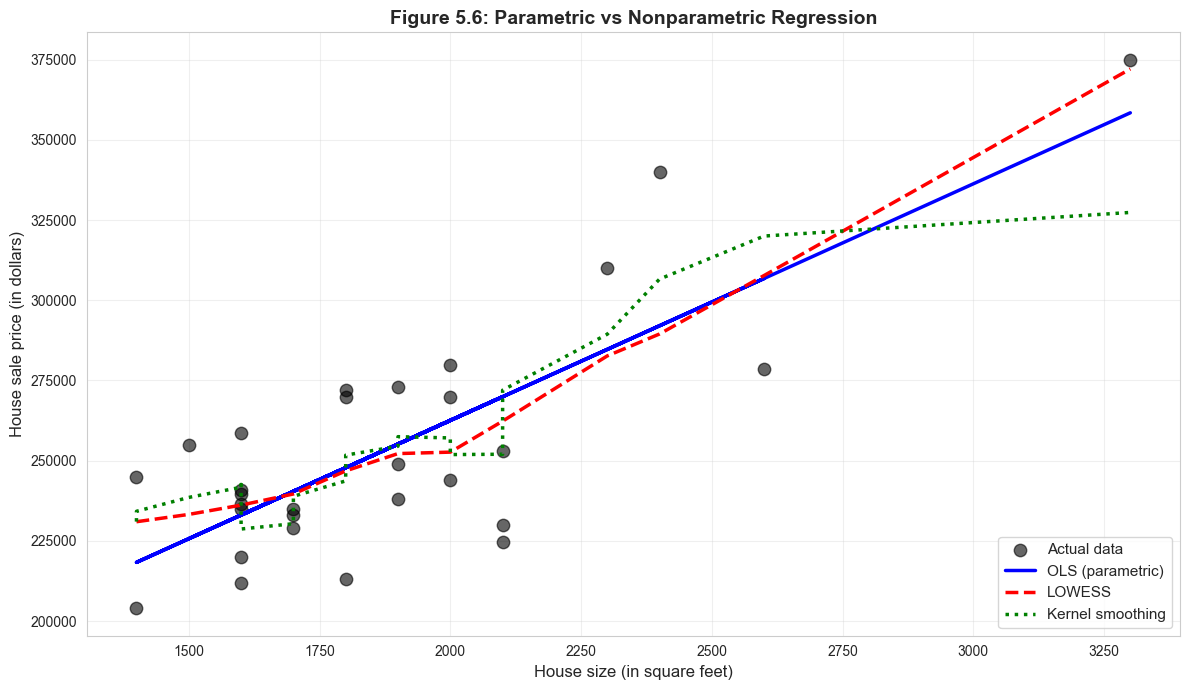


Interpretation:
• OLS (blue solid): Assumes linear relationship
• LOWESS (red dashed): Flexible, data-driven curve
• Kernel smoothing (green dotted): Another flexible method

For this data, all three methods are similar, suggesting
that the linear model is a reasonable approximation.


In [21]:
# Nonparametric regression
print("=" * 70)
print("NONPARAMETRIC REGRESSION")
print("=" * 70)

# LOWESS smoothing
lowess_result = lowess(price, size, frac=0.6)

# Kernel smoothing (Gaussian filter approximation)
sort_idx = np.argsort(size)
size_sorted = size.iloc[sort_idx]
price_sorted = price.iloc[sort_idx]
sigma = 2  # bandwidth parameter
price_smooth = gaussian_filter1d(price_sorted, sigma)

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 7))

# Scatter plot
ax.scatter(size, price, s=80, alpha=0.6, color='black',
           edgecolor='black', label='Actual data', zorder=1)

# OLS line
ax.plot(size, model.fittedvalues, color='blue', linewidth=2.5,
        label='OLS (parametric)', zorder=2)

# LOWESS
ax.plot(lowess_result[:, 0], lowess_result[:, 1], color='red',
        linewidth=2.5, linestyle='--', label='LOWESS', zorder=3)

# Kernel smoothing
ax.plot(size_sorted, price_smooth, color='green', linewidth=2.5,
        linestyle=':', label='Kernel smoothing', zorder=4)

ax.set_xlabel('House size (in square feet)', fontsize=12)
ax.set_ylabel('House sale price (in dollars)', fontsize=12)
ax.set_title('Figure 5.6: Parametric vs Nonparametric Regression',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("• OLS (blue solid): Assumes linear relationship")
print("• LOWESS (red dashed): Flexible, data-driven curve")
print("• Kernel smoothing (green dotted): Another flexible method")
print("\nFor this data, all three methods are similar, suggesting")
print("that the linear model is a reasonable approximation.")

## Interpreting Nonparametric Regression

**Comparing three approaches to fitting the data:**

**1. OLS (Ordinary Least Squares) — BLUE LINE**
- **Parametric**: Assumes linear relationship
- **Equation**: ŷ = $115,017 + $73.77 × size
- **Advantage**: Simple, interpretable, efficient
- **Limitation**: Restricted to straight lines

**2. LOWESS (Locally Weighted Scatterplot Smoothing) — RED DASHED**
- **Nonparametric**: Lets data determine the shape
- **Method**: Fits weighted regressions in local neighborhoods
- **Advantage**: Flexible, can capture curves
- **Limitation**: Harder to interpret, more complex

**3. Kernel Smoothing — GREEN DOTTED**
- **Nonparametric**: Weighted moving averages
- **Method**: Uses Gaussian kernel to smooth nearby points
- **Advantage**: Very smooth curves
- **Limitation**: Choice of bandwidth affects results

**What does this comparison tell us?**

**Key observation: All three lines are very similar!**
- LOWESS and kernel smoothing follow OLS closely
- No obvious systematic curvature
- The relationship appears genuinely linear

**This validates our linear model:**
- If nonparametric methods showed strong curvature, we'd question the linear assumption
- Since they align with OLS, the linear model is appropriate
- We can confidently use the simpler parametric approach

**When would nonparametric methods differ?**

**Example scenarios:**
- **Diminishing returns**: Price increases with size, but at a decreasing rate
- **Threshold effects**: Small houses have steep price-size relationship, large houses flatten
- **Nonlinear relationships**: Exponential, logarithmic, or polynomial patterns

**For our housing data:**
- Linear model works well
- Adding complexity (nonparametric) doesn't improve fit much
- **Occam's Razor**: Choose the simpler model when performance is similar

**Practical use of nonparametric methods:**
- **Exploratory analysis**: Check for nonlinearity before modeling
- **Model diagnostics**: Verify linear assumption
- **Flexible prediction**: When functional form is unknown
- **Complex relationships**: When theory doesn't suggest specific form

**Bottom line:** Nonparametric methods confirm that our linear regression is appropriate for this dataset. The relationship between house price and size is genuinely linear, not curved.

## Chapter Summary

**Key Takeaways:**

1. **Bivariate relationships** can be summarized using:
   - Scatter plots (visual)
   - Correlation coefficient (strength and direction)
   - Regression line (predictive equation)

2. **Correlation coefficient** ($r$):
   - Ranges from -1 to 1
   - Measures strength of linear association
   - Unit-free and symmetric

3. **Simple linear regression:**
   - Model: $y = \beta_1 + \beta_2 x + u$
   - Fitted line: $\hat{y} = b_1 + b_2 x$
   - OLS minimizes sum of squared residuals
   - Slope $b_2$: change in y per unit change in x

4. **Measures of fit:**
   - **R²:** Proportion of variation explained (0 to 1)
   - **Standard error ($s_e$):** Typical size of residuals
   - For simple regression: $R^2 = r^2$

5. **Interpretation:**
   - Regression measures **association**, not **causation**
   - Predictions are reliable within the data range
   - Extrapolation outside the data range is risky

6. **Extensions:**
   - Nonparametric methods allow flexible functional forms
   - Multiple regression (Chapters 10-12) includes many x variables

**Economic Applications:**
- Housing economics: price-size relationship
- Labor economics: earnings-education relationship
- Macroeconomics: consumption-income relationship
- Finance: asset returns and market returns (CAPM)

**Statistical Concepts Covered:**
- Two-way scatter plots
- Covariance and correlation
- Ordinary Least Squares (OLS) estimation
- Residuals and fitted values
- R-squared and standard error
- Sum of squares decomposition
- Nonparametric smoothing

**Python Tools Used:**
- `pandas`: Data manipulation and summary statistics
- `statsmodels`: Regression analysis
- `matplotlib` & `seaborn`: Visualization
- `scipy`: Statistical functions and smoothing

**Next Steps:**
- **Chapter 6**: The Least Squares Estimator (theoretical properties)
- **Chapter 7**: Statistical Inference for Bivariate Regression (confidence intervals, hypothesis tests)
- **Chapters 10-12**: Multiple Regression (many x variables)

---

**Congratulations!** You've mastered the basics of bivariate data analysis and simple linear regression. You now understand:
- How to measure and visualize relationships between two variables
- How to fit and interpret a regression line
- How to assess model fit
- The crucial distinction between association and causation

These tools form the foundation for all of econometric analysis!